## Black-hole binary formation channels with gaussian mixtures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy

In [2]:
np.load

<function numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII', *, max_header_size=10000)>

In [3]:
masses = np.load('formationchannels.npy')
masses.shape

(2950, 1)

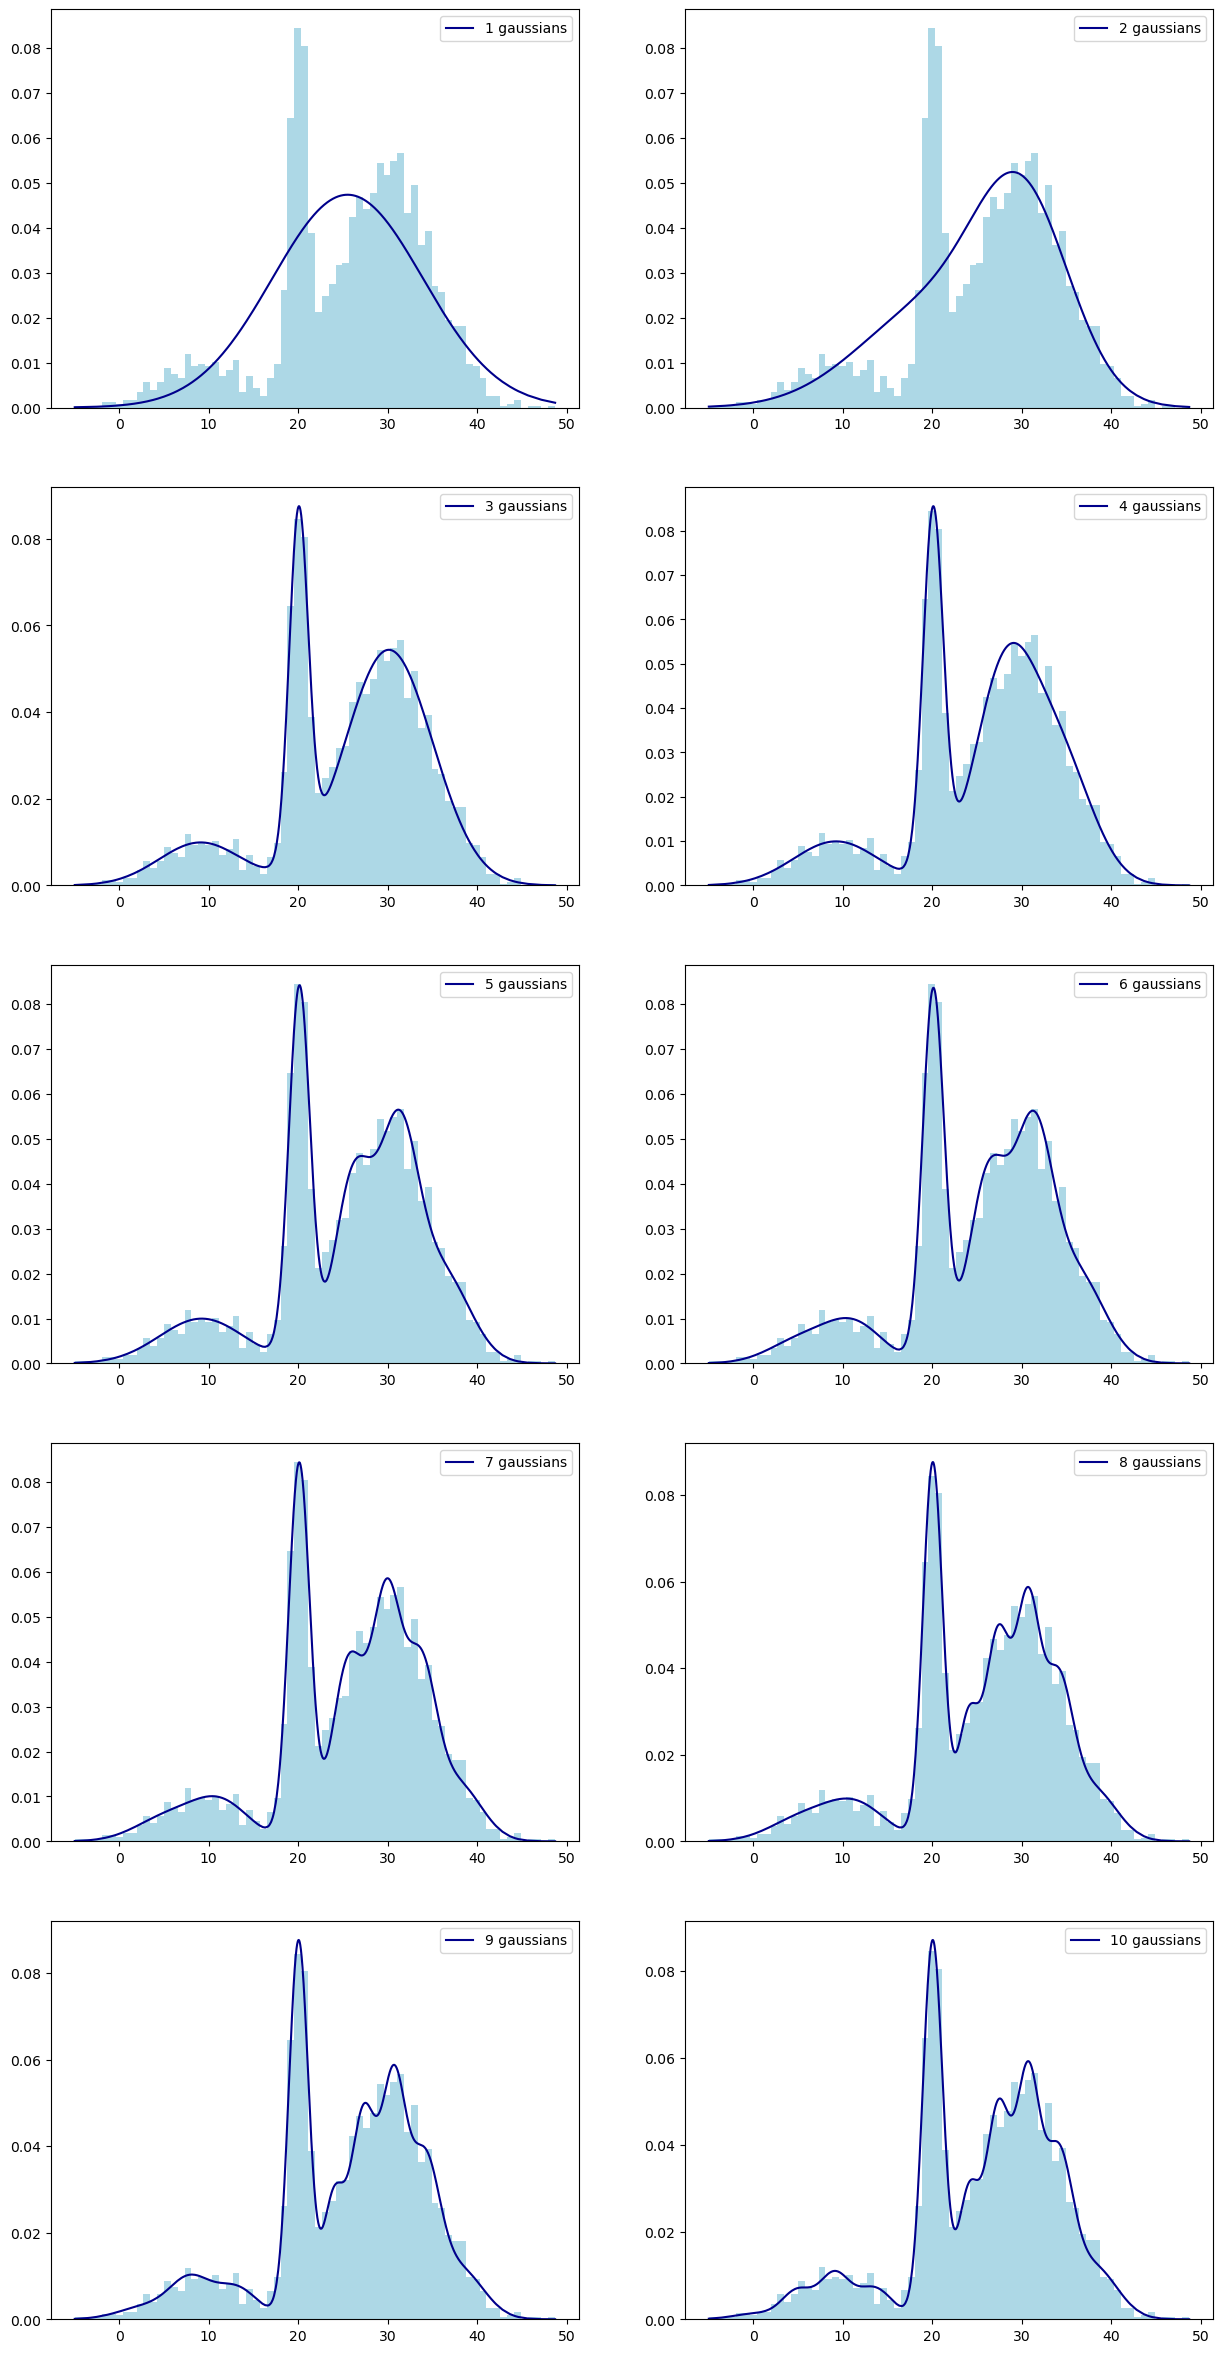

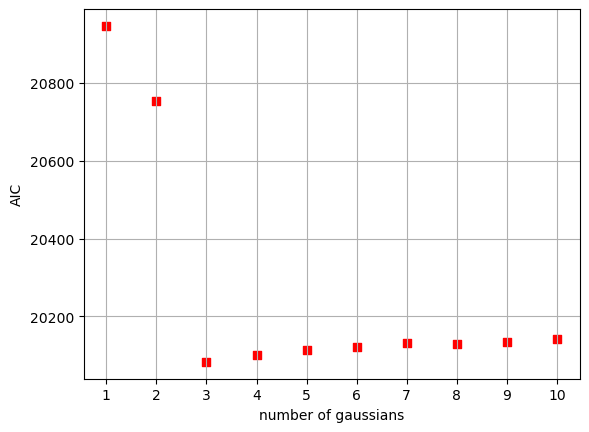

In [10]:
m = np.sort(masses[:,0])
AIC = []

fig = plt.figure(figsize=(15, 30))

N_fit = 10
G = np.zeros((len(m),N_fit))

for k in range(N_fit):
    N = k+1
    gm = GaussianMixture(n_components=N,random_state=0).fit(masses)
    
    AIC.append(gm.aic(masses))
    
    sigmas = np.zeros(N)       # array with stand dev of each gaussian of the model
    for i in range(N):
        sigmas[i] = np.sqrt(gm.covariances_[i][0][0])
        G[:,k] += gm.weights_[i] * scipy.stats.norm(gm.means_[i,0],sigmas[i]).pdf(m)
    
    # plot histogram with fit for different N
    ax = fig.add_subplot(5,2,N)
    ax.hist(masses,70,density=True,color='lightblue')
    ax.plot(m,G[:,k],color='darkblue',label=str(N)+' gaussians')
    ax.legend()

plt.show()  

#plot N vs AIC
plt.scatter(np.arange(1,N_fit+1), AIC, marker='s',color='r')
plt.xlabel('number of gaussians')
plt.ylabel('AIC')
plt.xticks(np.arange(1,N+1),np.arange(1,N+1))
plt.grid()
plt.show()

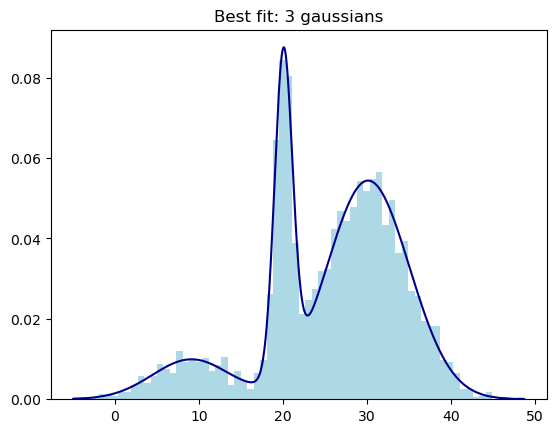

In [12]:
best_model = AIC.index(min(AIC))            # minimum of the AIC

plt.hist(masses, 70, density=True,color='lightblue')
plt.plot(m, G[:,best_model], color='darkblue')
plt.title('Best fit: '+str(best_model+1)+' gaussians')
plt.show()

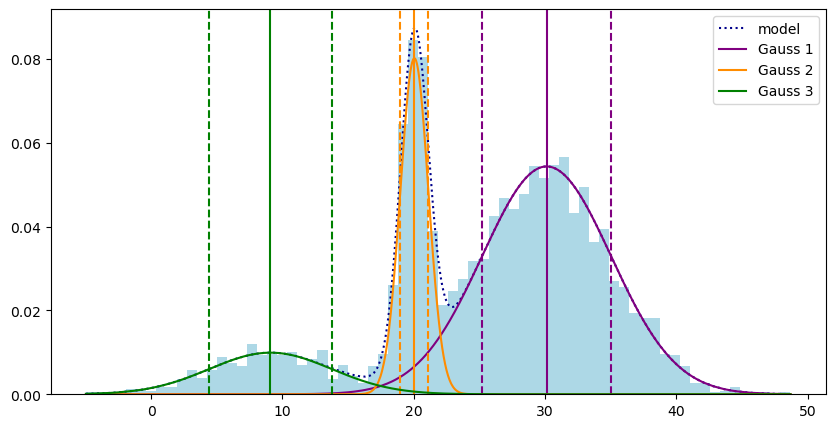

In [16]:
#Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset

N = 3

g = np.zeros((len(m),N))
G = np.zeros(len(m))

gm = GaussianMixture(n_components=N,random_state=0).fit(masses)

sigmas = []      
means = []
weights = []

for i in range(N):
    sigmas.append( np.sqrt(gm.covariances_[i])[0,0] )
    means.append( gm.means_[i,0] )
    weights.append( gm.weights_[i] )
    g[:,i] = weights[i]* scipy.stats.norm(means[i], sigmas[i]).pdf(m) # explicit: 1/np.sqrt(2*np.pi)/sigmas[i] * np.exp(-(m-means[i])**2 /2/sigmas[i]**2)

G = np.exp(gm.score_samples(m.reshape(len(m),1)))   # probability density of the samples distribution

plt.figure(figsize=(10,5))
plt.hist(masses,70,density=True,color='lightblue')
colors = ['purple','darkorange','green']
plt.plot(m,G,color='darkblue',ls='dotted',label='model')

for i in range(N):
    plt.plot(m,g[:,i],color=colors[i],label='Gauss '+str(i+1))
    plt.axvline(means[i],color=colors[i])
    plt.axvline(means[i]+sigmas[i],color=colors[i],linestyle='--')
    plt.axvline(means[i]-sigmas[i],color=colors[i],linestyle='--')

plt.legend()
plt.show()  


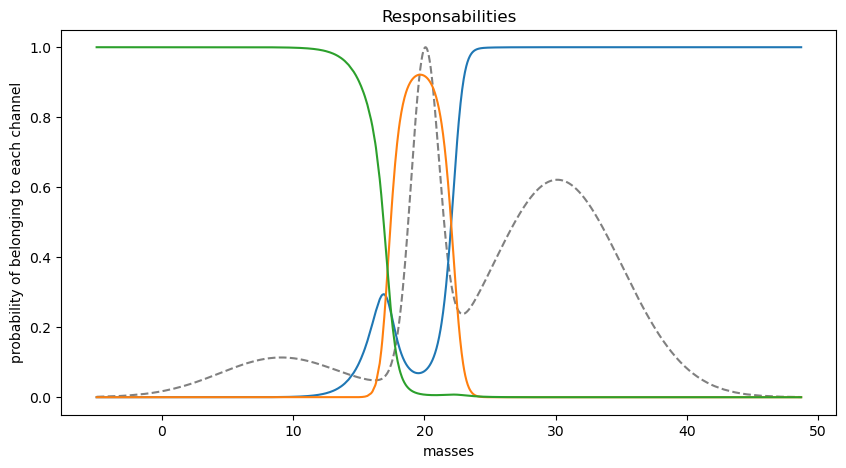

In [22]:
# Manual computation of responsabilities

p = []
for i in range(len(m)):
    p.append( g[i,:]/np.sum(g[i,:]) )       # computing the responsabilities

plt.figure(figsize=(10,5))
plt.plot(m,G/max(G),color='grey',linestyle='--')
plt.plot(m, p)
plt.title('Responsabilities')
plt.xlabel('masses')
plt.ylabel('probability of belonging to each channel')
plt.show()

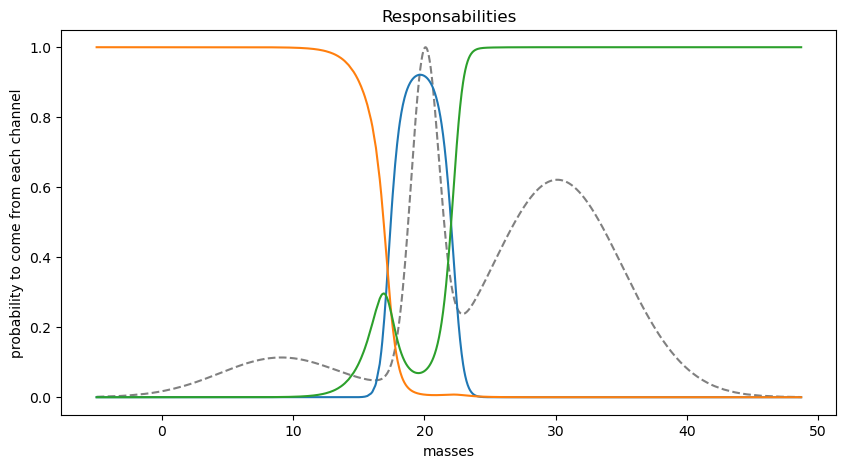

In [23]:
# Responsabilities with GaussianMixture

gm = GaussianMixture(n_components=3,random_state=50).fit(masses)
pred = gm.predict_proba(m.reshape(len(m),1))

plt.figure(figsize=(10,5))
plt.plot(m, G/max(G), color='grey', ls='dashed')
for i in range(3):
    plt.plot(m, pred[:,i])

plt.title('Responsabilities')
plt.xlabel('masses')
plt.ylabel('probability to come from each channel')
plt.show()